In [99]:
import plotly
import librosa

import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline    as py

from librosa                     import display
from scipy.io                    import wavfile
from scipy                       import signal
from tensorflow.python.framework import ops

import os
from random import shuffle

In [2]:
#plotly.__version__

In [3]:
py.init_notebook_mode(connected=True)

In [4]:
y, sr = librosa.load('C:/Users/310262408/Downloads/speech_commands_v0.01.tar/speech_commands_v0.01/happy/3ab9ba07_nohash_0.wav', sr=8000)

In [5]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)

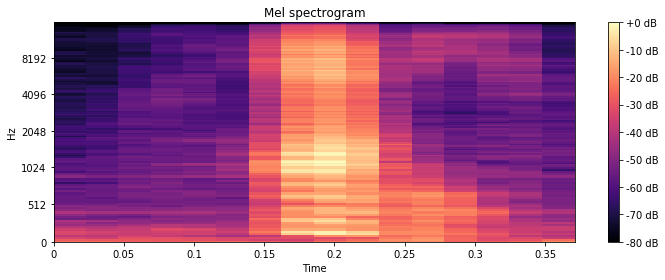

In [6]:
plt.figure(figsize=(10, 4))

librosa.display.specshow(librosa.power_to_db(mel,
                                             ref=np.max),
                                             y_axis='mel', fmax=16000,
                                             x_axis='time')

plt.colorbar    (format='%+2.0f dB')
plt.title       ('Mel spectrogram')
plt.tight_layout()

In [7]:
np.shape(mel)

(128, 16)

In [ ]:
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [8]:
plt.figure(figsize=(10, 4))

librosa.display.specshow(mfcc, x_axis='time')

plt.colorbar    ()
plt.title       ('MFCC')
plt.tight_layout()

NameError: name 'mfcc' is not defined

<Figure size 720x288 with 0 Axes>

In [ ]:
def log_specgram(path, window_size=20, step_size=10, eps=1e-10):
    sample_rate, audio = wavfile.read(path)
    
    nperseg  = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size   * sample_rate / 1e3))
    
    freqs, times, spec = signal.spectrogram(audio,
                                    fs       = sample_rate,
                                    window   = 'hann'     ,
                                    nperseg  = nperseg    ,
                                    noverlap = noverlap   ,
                                    detrend  = False       )
    
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [9]:
freqs, times, spectrogram = log_specgram('C:/Users/310262408/Downloads/speech_commands_v0.01.tar/speech_commands_v0.01/happy/3ab9ba07_nohash_0.wav')

NameError: name 'log_specgram' is not defined

In [10]:
#data   = [go.Surface(z=spectrogram.T)]
#layout = go.Layout(
#    title = 'Specgtrogram of "yes" in 3d',
#    scene = dict(
#    yaxis = dict(title='Frequencies'   , range=freqs),
#    xaxis = dict(title='Time'          , range=times),
#    zaxis = dict(title='Log amplitude'              ),
#    ),
#)
#fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)

In [11]:
mel_min = min(mel.min(axis=0))
print(mel_min)

1.4123496e-08


In [12]:
mel_max = max(mel.max(axis=0))
print(mel_max)

30.809784


In [13]:
mel_norm = (mel - mel_min) / (mel_max - mel_min)

In [14]:
mel_norm

array([[3.2354794e-03, 2.9470061e-03, 2.0875721e-03, ..., 1.9491160e-03,
        2.4031790e-03, 1.1175275e-02],
       [1.6078276e-03, 1.5310320e-03, 1.4677250e-03, ..., 7.0184265e-04,
        9.7888778e-04, 3.1716358e-03],
       [4.3297769e-04, 3.0274680e-04, 9.1999216e-04, ..., 5.5536372e-04,
        5.7676493e-04, 2.1294066e-04],
       ...,
       [1.3400609e-08, 1.1891716e-08, 3.5539845e-08, ..., 4.6025175e-06,
        2.1453079e-06, 9.5633091e-08],
       [9.4430055e-09, 3.3643863e-09, 9.1738865e-09, ..., 8.7982812e-07,
        5.1786412e-07, 2.7163443e-08],
       [8.8687653e-09, 1.9871411e-09, 9.1807013e-11, ..., 1.9209729e-08,
        9.1197974e-09, 0.0000000e+00]], dtype=float32)

In [15]:
norm_min = min(mel_norm.min(axis=0))
print(norm_min)

norm_max = max(mel_norm.max(axis=0))
print(norm_max)

0.0
1.0


In [78]:
class Training_Example:
    def __init__(self, mel, label):
        self.mel   = mel
        self.label = label

In [101]:
def load_data_set(path):
    training_examples = []
    
    count = 0
    num_examples = 0
    
    for directory in os.listdir(path):
        label = directory
        
        if os.path.isdir(path + '/' + directory) and directory != '_background_noise_':
            for wavFile in os.listdir(path + '/' + directory):
                y, sr = librosa.load(path + '/' + directory + '/' + wavFile, sr=8000)
                
                if y.shape[0] != sr:
                    y = np.append(y, [0] * (sr - len(y)))
                
                mel   = librosa.feature.melspectrogram(y=y, sr=sr)
                
                mel_min = min(mel.min(axis=0))
                mel_max = max(mel.max(axis=0))
                
                denom = mel_max - mel_min
                if denom == 0.0 or np.isnan(denom):
                    continue
                
                mel_norm = (mel - mel_min) / (mel_max - mel_min)
                
                mel_norm = np.expand_dims(mel_norm, axis=-1)
                
                example = Training_Example(mel_norm, np.eye(2)[count])
                training_examples.append(example)
                num_examples += 1
                
            count += 1
            print(num_examples)
            if count == 2:
                break
            
    return training_examples, count

In [102]:
training_examples, num_labels = load_data_set('C:/Users/310262408/Downloads/speech_commands_v0.01.tar/speech_commands_v0.01')

1713
3443


In [85]:
print(np.shape(m))
print(np.shape(s))
print(s[0])
print(s[3000])
print(num_labels)

(3443, 128, 16, 1)
(3443,)
0
1
1


In [88]:
training_examples[0].mel

array([[[2.8125676e-08],
        [3.8261245e-08],
        [2.5756114e-07],
        ...,
        [1.2636881e-06],
        [1.5328704e-06],
        [1.2895133e-06]],

       [[1.9426158e-08],
        [2.3448264e-08],
        [5.8725135e-08],
        ...,
        [1.8516640e-06],
        [1.8608167e-06],
        [4.0232058e-07]],

       [[1.9718399e-08],
        [4.7285265e-08],
        [3.4852231e-08],
        ...,
        [3.0697940e-06],
        [3.7882457e-06],
        [1.0207376e-06]],

       ...,

       [[1.7154252e-09],
        [1.1263507e-09],
        [1.0397969e-09],
        ...,
        [1.6538690e-08],
        [2.3961338e-08],
        [1.1901768e-08]],

       [[2.5010261e-10],
        [2.8463065e-10],
        [2.1935573e-10],
        ...,
        [3.2489142e-09],
        [2.2002697e-09],
        [8.1376872e-10]],

       [[4.5577705e-11],
        [1.5822363e-11],
        [0.0000000e+00],
        ...,
        [1.6707709e-10],
        [5.4622560e-11],
        [8.1889356e-11]]

In [19]:
s_hot = np.eye(2)[s]

In [20]:
print(s_hot[0]   )
print(s_hot[3000])

[1. 0.]
[0. 1.]


In [93]:
def getBatch(examples, batch, batch_size):
    start = batch       * batch_size
    end   = (batch + 1) * batch_size
    
    freqs  = []
    labels = []
    
    if end >= len(examples):
        end = len(examples)
    
    for i in range(start, end):
        freqs.append(examples [i].mel  )
        labels.append(examples[i].label)
    
    return freqs, labels

In [105]:
def simple_training_model(training_examples, numCategories, learning_rate = 1e-5, num_epochs = 5, batch_size = 32):
    ops.reset_default_graph()
    m = len(training_examples)
    
    model_input  = tf.placeholder(dtype = tf.float32, shape = (None, 128, 16, 1),    name = 'mel_input'   )
    labels       = tf.placeholder(dtype = tf.float32, shape = (None, numCategories), name = 'labels'      )
    is_training  = tf.placeholder(dtype = tf.bool,                                   name = 'is_training' )
    
    with tf.device('cpu:0'):
        output = tf.layers.conv2d       (model_input, filters=64, kernel_size=(7, 3), padding='SAME', activation=tf.nn.elu)
        output = tf.layers.max_pooling2d(output, pool_size=(1, 3), strides=(1,1),     padding='SAME')
        
        output = tf.layers.conv2d       (output,      filters=128, kernel_size=(1, 7), padding='SAME', activation=tf.nn.elu)
        output = tf.layers.max_pooling2d(output, pool_size=(1, 4), strides=(1,1),      padding='SAME')
        
        output = tf.layers.conv2d       (output,      filters=128, kernel_size=(1, 7), padding='SAME', activation=tf.nn.elu)
        output = tf.layers.max_pooling2d(output, pool_size=(1, 4), strides=(1,1),      padding='SAME')
        
        output = tf.layers.conv2d       (output,      filters=256, kernel_size=(1, 10), padding='VALID', activation=tf.nn.elu)
        output = tf.layers.conv2d       (output,      filters=512, kernel_size=(1, 2), activation=tf.nn.elu)
        
        output         = tf.layers.flatten(output)
        output         = tf.layers.dropout(output, training=is_training)
        output         = tf.layers.dense  (output, numCategories)
        softmax_output = tf.nn.softmax    (output, name='final_output')
        
        cost      = tf.reduce_mean(tf.abs(labels - softmax_output))
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
        
        saver = tf.train.Saver()
    
        init  = tf.global_variables_initializer()

        sess = tf.Session()
        sess.run(init)
        
        tf.train.write_graph(sess.graph.as_graph_def(), './tmp/input_model', 'input_word_recognition.pbtxt', True)

        for epoch in range(num_epochs):
            epoch_cost = 0
            num_batches = (int)(m / batch_size)
            
            shuffle(training_examples)
            for batch in range(num_batches):
                freqs, l   = getBatch(training_examples, batch, batch_size)
                
                _, batch_cost = sess.run([optimizer, cost], feed_dict = { model_input : freqs, labels : l, is_training : True})
                epoch_cost += batch_cost / num_batches
        
            if 10 % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
                print ()
                print ("---------------------------------------------")
                print ()
                saver.save(sess, './tmp/word_recognition.ckpt')
                
        print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        print ()
        print ("---------------------------------------------")
        print ()
        saver.save(sess, './tmp/word_recognition.ckpt')

In [106]:
simple_training_model(training_examples, numCategories = num_labels, num_epochs=10, batch_size = 16)

Cost after epoch 0: 0.326355

---------------------------------------------



KeyboardInterrupt: 

In [100]:
ops.reset_default_graph()

with tf.device(':cpu0'):
    model_input = np.random.rand(2, 128, 16, 1)
    model_input = tf.cast(model_input, tf.float32)
    
    output = tf.layers.conv2d       (model_input, filters=64, kernel_size=(7, 3), padding='SAME', activation=tf.nn.elu)
    output = tf.layers.max_pooling2d(output, pool_size=(1, 3), strides=(1,1))
    
    output = tf.layers.conv2d       (output, filters=128, kernel_size=(1, 7), padding='SAME', activation=tf.nn.elu)
    output = tf.layers.max_pooling2d(output, pool_size=(1, 4), strides=(1,1))
    
    output = tf.layers.conv2d       (output, filters=256, kernel_size=(1, 10), padding='VALID', activation=tf.nn.elu)
    output = tf.layers.conv2d       (output, filters=512, kernel_size=(1, 2), activation=tf.nn.elu)
    
    output = tf.layers.flatten(output)
    output = tf.layers.dropout(output)
    output = tf.layers.dense  (output, 5000)
    output = tf.layers.dropout(output)
    output = tf.layers.dense  (output, 11)
    softmax_output  = tf.nn.softmax  (output)
    
    

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
o = sess.run(output)

print(np.shape(o))

(2, 11)


In [54]:
ops.reset_default_graph()

test_input = m[1010:1011]
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./tmp/word_recognition.ckpt.meta')
    saver.restore(sess, './tmp/word_recognition.ckpt')
    graph = tf.get_default_graph()
    out = graph.get_tensor_by_name('final_output:0')
    
    encoding = sess.run(out, feed_dict = { 'mel_input:0' : test_input, 'is_training:0' : False })
    
sencoding = encoding[0]
print(sencoding)
print(s_hot[3100])

INFO:tensorflow:Restoring parameters from ./tmp/word_recognition.ckpt
[1. 0.]
[0. 1.]


In [61]:
test_append = []
test_append.append(s_hot[:100])
test_append.append(s_hot[3000:3100])

In [62]:
test_append

[array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1